# Importing Required Libraries and Modules

In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

Using TensorFlow backend.


In [69]:
# dimensions of our images.
img_width, img_height = 150, 150

In [70]:
train_data_dir = 'Aug_Img_Dataset/training_set'
validation_data_dir = 'Aug_Img_Dataset/test_set'

In [50]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

In [51]:
# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical',
        shuffle=True)

Found 1200 images belonging to 3 classes.


In [52]:
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 120 images belonging to 3 classes.


In [53]:
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings('ignore')

# Applying RMSProp Optimizer

In [54]:
from keras.optimizers import RMSprop

In [55]:
optimizer = RMSprop(lr=0.00025)

In [56]:
batch_size= 10
epochs = 20

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))#softmax

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_31 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 32)       

In [57]:
import pydot
import graphviz


In [58]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [59]:
#model.summary()
nb_epoch = 20
nb_train_samples = 300
nb_validation_samples = 100

# Using Callbacks (Checkpoint,EarlyStopping and ReduceLROnPlateau)

In [60]:
tbCallBack=[]
tbCallBack=TensorBoard(log_dir='./Graph_RMS1')
tbCallBackchptk=ModelCheckpoint('models/checkpoints/weightsRMS1.h5',save_weights_only=True)
tbCallBackearlyStop=EarlyStopping(patience=3)
tbCallBackReduceLRonPlateau=ReduceLROnPlateau(monitor='loss',
                                   factor=0.1,
                                   cooldown=0,
                                   patience=3,
                                   min_lr=1e-4)
 

# Running and Saving the Model

In [61]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples, callbacks=[tbCallBack,tbCallBackchptk,tbCallBackearlyStop,tbCallBackReduceLRonPlateau])
model.save('models/model1amazonimagesRMSprop1.h5')
print(model.evaluate_generator(validation_generator, nb_validation_samples))

Epoch 1/20
18/18 [==============================] - 90s 5s/step - loss: 1.0931 - accuracy: 0.3958 - val_loss: 1.0809 - val_accuracy: 0.4500
Epoch 2/20
18/18 [==============================] - 97s 5s/step - loss: 1.0822 - accuracy: 0.4028 - val_loss: 1.0468 - val_accuracy: 0.6167
Epoch 3/20
18/18 [==============================] - 92s 5s/step - loss: 1.0713 - accuracy: 0.4375 - val_loss: 1.0462 - val_accuracy: 0.4583
Epoch 4/20
18/18 [==============================] - 86s 5s/step - loss: 1.0673 - accuracy: 0.3924 - val_loss: 1.0087 - val_accuracy: 0.6167
Epoch 5/20
18/18 [==============================] - 94s 5s/step - loss: 1.0498 - accuracy: 0.4375 - val_loss: 0.9346 - val_accuracy: 0.5000
Epoch 6/20
18/18 [==============================] - 91s 5s/step - loss: 1.0105 - accuracy: 0.4514 - val_loss: 0.8738 - val_accuracy: 0.6917
Epoch 7/20
18/18 [==============================] - 78s 4s/step - loss: 0.9887 - accuracy: 0.5278 - val_loss: 0.8117 - val_accuracy: 0.6000
Epoch 8/20
18/18 [==

# Adjusting Learning Rate from .00025 to .0025

In [62]:
optimizer = RMSprop(lr=0.0025)

In [63]:
batch_size= 10
epochs = 20

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('sigmoid'))#softmax

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_37 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 32)       

In [64]:
import pydot
import graphviz


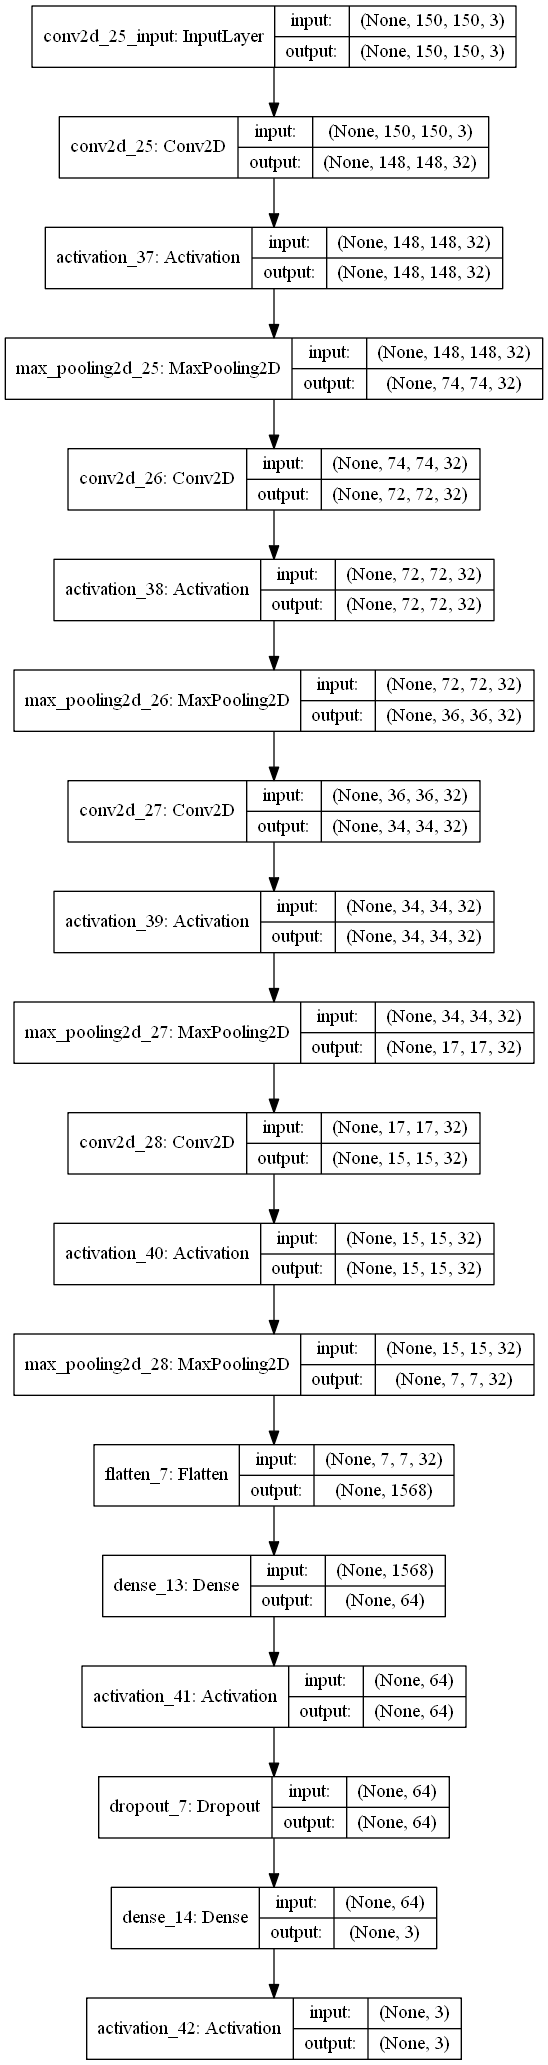

In [65]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [66]:
#model.summary()
nb_epoch = 20
nb_train_samples = 300
nb_validation_samples = 100

In [67]:
tbCallBack=[]
tbCallBack=TensorBoard(log_dir='./Graph_RMS2')
tbCallBackchptk=ModelCheckpoint('models/checkpoints/weightsRMS2.h5',save_weights_only=True)
tbCallBackearlyStop=EarlyStopping(patience=3)
tbCallBackReduceLRonPlateau=ReduceLROnPlateau(monitor='loss',
                                   factor=0.1,
                                   cooldown=0,
                                   patience=3,
                                   min_lr=1e-4)

In [68]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples, callbacks=[tbCallBack,tbCallBackchptk,tbCallBackearlyStop,tbCallBackReduceLRonPlateau])
model.save('models/model1amazonimagesRMSprop2.h5')
print(model.evaluate_generator(validation_generator, nb_validation_samples))

Epoch 1/20
18/18 [==============================] - 73s 4s/step - loss: 1.2078 - accuracy: 0.3576 - val_loss: 1.0957 - val_accuracy: 0.3750
Epoch 2/20
18/18 [==============================] - 76s 4s/step - loss: 1.1044 - accuracy: 0.3021 - val_loss: 1.0968 - val_accuracy: 0.4000
Epoch 3/20
18/18 [==============================] - 87s 5s/step - loss: 1.1255 - accuracy: 0.3819 - val_loss: 1.0463 - val_accuracy: 0.6250
Epoch 4/20
18/18 [==============================] - 90s 5s/step - loss: 1.0607 - accuracy: 0.4340 - val_loss: 1.1638 - val_accuracy: 0.4833
Epoch 5/20
18/18 [==============================] - 76s 4s/step - loss: 1.0412 - accuracy: 0.4479 - val_loss: 1.0512 - val_accuracy: 0.5000
Epoch 6/20
18/18 [==============================] - 80s 4s/step - loss: 1.0310 - accuracy: 0.4826 - val_loss: 0.9192 - val_accuracy: 0.5667
Epoch 7/20
18/18 [==============================] - 75s 4s/step - loss: 1.0205 - accuracy: 0.5660 - val_loss: 1.1029 - val_accuracy: 0.6500
Epoch 8/20
18/18 [==